In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('..')
from exp_hh_model import HH_model_exp
from dataset_reader import Traces_Dataset

Simulation set up

In [2]:
# read test dataset in df
df = pd.read_csv('../dataset_test.csv')

test_prestep_V = df.iloc[:, 0].values
test_step_Vs = df.iloc[:, 1:9].values
test_params = df.iloc[:, -7:].values

In [3]:
sample = 70 #4

prestep_V = test_prestep_V[sample]
step_Vs = test_step_Vs[sample]
t = np.arange(0.0, 6.0, 0.01)

sim_settings = {'prestep_V': prestep_V, 'step_Vs': step_Vs, 't': t}

In [4]:
dataset = Traces_Dataset('../dataset_test.csv')
time_traces = dataset.time_traces[sample].numpy()
current_traces = dataset.current_traces[sample].numpy()

In [5]:
p = test_params[sample, 0]
g_max = test_params[sample, 1]
E_rev = test_params[sample, 2]
a_m = test_params[sample, 3]
b_m = test_params[sample, 4]
delta_m = test_params[sample, 5]
s_m = test_params[sample, 6]

params ={'p': p, 'g_max': g_max, 'E_rev': E_rev, 'a_m': a_m, 'b_m': b_m, 'delta_m': delta_m, 's_m': s_m}

In [6]:
model = HH_model_exp(params, sim_settings)
model.simulation().shape

(8, 600)

In [7]:
model.check_current_ss(), model.check_steady_state_curve()

/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exp_rates_generalized_exp_setup/figures/../exp_hh_model.py:85: RuntimeWarning: divide by zero encountered in divide
  diff_arr = np.abs((self.current_traces[i, :][1:] - self.current_traces[i, :][:-1]) / (self.current_traces[i, :][:-1] - self.current_traces[i, :][0]))


(True, True)

In [8]:
t_less_0 = np.arange(-2, 0, 0.01)
t_large_0 = np.arange(0, 6, 0.01)
prestep_V_plt = np.full(len(t_less_0), prestep_V)

step_Vs_plt = np.zeros((8, len(t_large_0)))
for i in range(len(step_Vs)):
    step_Vs_plt[i] = np.full(len(t_large_0), step_Vs[i])

In [9]:
plot_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink', 'orange']

Text(0, 0.5, 'Membrane Potential (mV)')

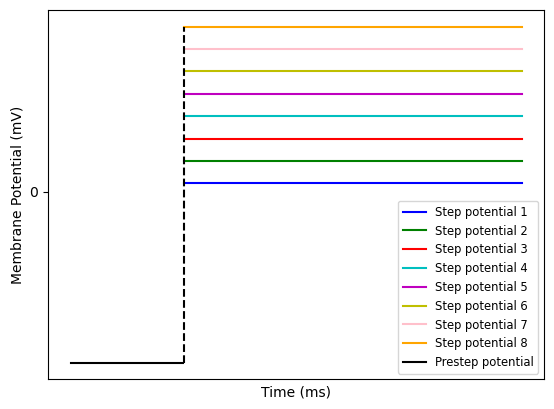

In [10]:
for i in range(8):
    plt.plot(t_large_0, step_Vs_plt[i, :], color = plot_colors[i], label = f'Step potential {i+1}')

plt.plot(t_less_0, prestep_V_plt, color = 'k', label = 'Prestep potential')
plt.legend(fontsize='small')

# plt.axvline(x = 0, ymin = 0, ymax = 1, color='k', linestyle='--')
x = 0
# Define the y-limits of the vertical line
y_min = prestep_V
y_max = np.max(step_Vs)
# Plot the vertical line segment
plt.plot([x, x], [y_min, y_max], color='k', linestyle='--')

# Turn off x and y axis ticks
plt.xticks([])
plt.yticks([0])

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')

Text(0, 0.5, 'Simulated current (pA)')

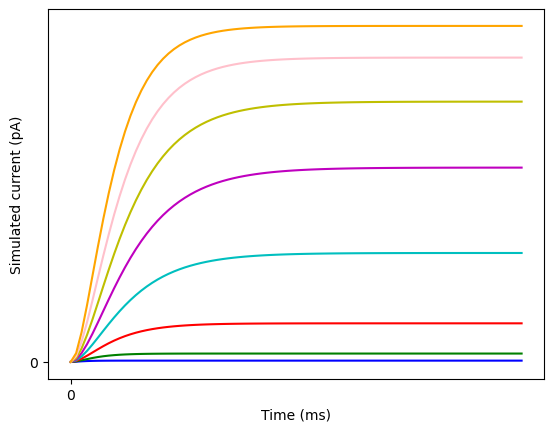

In [11]:
latest_threshold = np.max(model.max_index_array)

for i in range(8):
    plt.plot(t[:latest_threshold], model.current_traces[i, :latest_threshold], color = plot_colors[i])

# Turn off x and y axis ticks
plt.xticks([0])
plt.yticks([0])

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Simulated current (pA)')

In [12]:
m_inf = []
tau = []
for i in range(8):
    m_inf.append(model.m_infty(step_Vs[i]))
    tau.append(model.tau_m(step_Vs[i]))

m_inf = np.array(m_inf)
tau = np.array(tau)

In [13]:
V = np.arange(prestep_V - 10, step_Vs[-1] + 10, 0.1)
m_inf_curve = model.m_infty(V)
tau_curve = model.tau_m(V)

Text(0, 0.5, 'Activation steady-state $n_\\infty$')

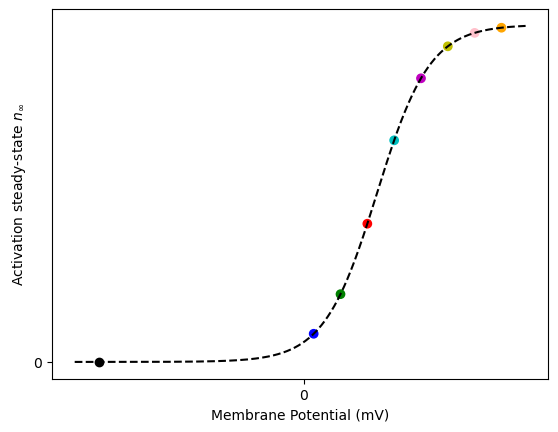

In [14]:
plt.plot(V, m_inf_curve, color = 'k', linestyle='--')
plt.scatter(step_Vs, m_inf, marker='o', color = plot_colors)
plt.scatter(prestep_V, model.m_infty(prestep_V), marker='o', color = 'black')

# Turn off x and y axis ticks
plt.xticks([0])
plt.yticks([0])

# Add labels and title
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Activation steady-state $n_\infty$')

Text(0, 0.5, 'Activation time constant $τ_n$')

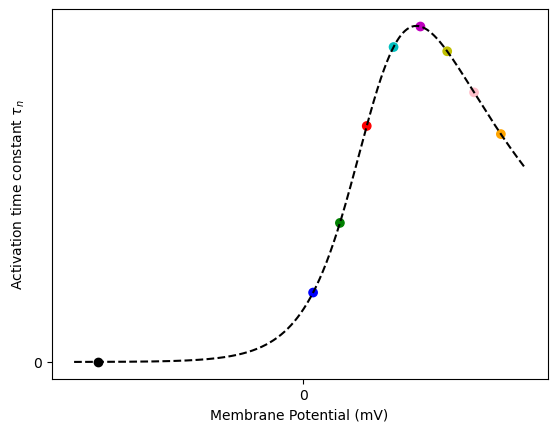

In [15]:
plt.plot(V, tau_curve, color = 'k', linestyle='--')
plt.scatter(step_Vs, tau, marker='o', color = plot_colors)
plt.scatter(prestep_V, model.tau_m(prestep_V), marker='o', color = 'black')

# Turn off x and y axis ticks
plt.xticks([0])
plt.yticks([0])

# Add labels and title
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Activation time constant $\u03C4_n$')

Linear interpolation 

Text(0, 0.5, 'Simulated Current (pA)')

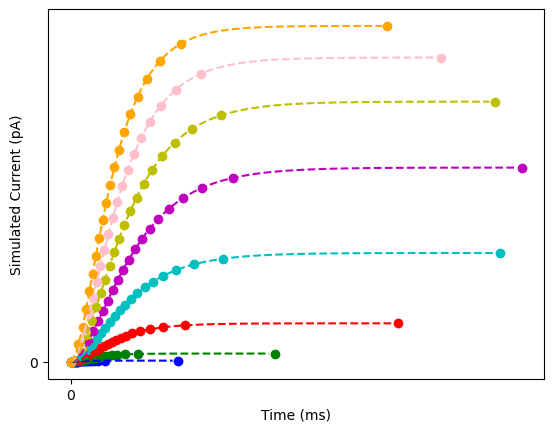

In [18]:
latest_threshold = np.max(model.max_index_array)

for i in range(8):
    plt.plot(t[:model.max_index_array[i]], model.current_traces[i, :model.max_index_array[i]], color = plot_colors[i], linestyle = '--')
    plt.scatter(time_traces[i], current_traces[i], color = plot_colors[i])
# Turn off x and y axis ticks
plt.xticks([0])
plt.yticks([0])

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Simulated Current (pA)')